## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [10]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [15]:
# Importing all datasets
employee_survey_data = pd.read_csv("employee_survey_data.csv")
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [16]:
general_data = pd.read_csv("general_data.csv")
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [17]:
in_time = pd.read_csv("in_time.csv")
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [26]:
out_time = pd.read_csv("out_time.csv")
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [21]:
manager_survey_data = pd.read_csv("manager_survey_data.csv")
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


#### Combining all data files into one consolidated dataframe

In [23]:
# Merging on 'customerID'
df_1 = pd.merge(manager_survey_data, employee_survey_data, how='inner', on='EmployeeID')

In [24]:
# Final dataframe with all predictor variables
df_2 = pd.merge(df_1, general_data, how='inner', on='EmployeeID')

In [27]:
data_final = df_2

### Step 2: Inspecting the Dataframe

In [28]:
# Let's see the head of our master dataset
data_final.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [29]:
# Let's check the dimensions of the dataframe
data_final.shape

(4410, 29)

In [20]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [30]:
# Let's see the type of each column
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobInvolvement           4410 non-null   int64  
 2   PerformanceRating        4410 non-null   int64  
 3   EnvironmentSatisfaction  4385 non-null   float64
 4   JobSatisfaction          4390 non-null   float64
 5   WorkLifeBalance          4372 non-null   float64
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   int64  
 12  EducationField           4410 non-null   object 
 13  EmployeeCount            4410 non-null   int64  
 14  Gender                  

In [50]:
object_variable = []
for name in data_final.columns:
    if(data_final[name].dtype == 'O'):
        object_variable.append(name)
        
for item in object_variable:
    print("%s has" %item, len(data_final[item].unique()), "variables")

Attrition has 2 variables
BusinessTravel has 3 variables
Department has 3 variables
EducationField has 6 variables
Gender has 2 variables
JobRole has 9 variables
MaritalStatus has 3 variables
Over18 has 1 variables


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [22]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [23]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [51]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data_final[['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus']], drop_first=True)

# Adding the results to the master dataframe
data_final = pd.concat([data_final, dummy1], axis=1)


In [52]:
data_final.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,0,0,0,0,0,0,0,0,1,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0,0,0,0,0,1,0,0,0,1
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,0,0,0,0,0,0,1,0,1,0
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,1,0,0,0,0,0,0,0,1,0
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,0,0,0,0,0,0,1,0,0,1


In [53]:
data_final = data_final.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus'], axis = 1)


In [55]:
data_final = data_final.drop('Over18',axis = 1)

In [57]:
data_final = data_final.drop('EmployeeID',axis = 1)

In [58]:
data_final.head()

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,EmployeeCount,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,3,3,3.0,4.0,2.0,51,No,6,2,1,...,0,0,0,0,0,0,0,0,1,0
1,2,4,3.0,2.0,4.0,31,Yes,10,1,1,...,0,0,0,0,0,1,0,0,0,1
2,3,3,2.0,2.0,1.0,32,No,17,4,1,...,0,0,0,0,0,0,1,0,1,0
3,2,3,4.0,4.0,3.0,38,No,2,5,1,...,1,0,0,0,0,0,0,0,1,0
4,3,3,4.0,1.0,3.0,32,No,10,1,1,...,0,0,0,0,0,0,1,0,0,1


In [59]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JobInvolvement                     4410 non-null   int64  
 1   PerformanceRating                  4410 non-null   int64  
 2   EnvironmentSatisfaction            4385 non-null   float64
 3   JobSatisfaction                    4390 non-null   float64
 4   WorkLifeBalance                    4372 non-null   float64
 5   Age                                4410 non-null   int64  
 6   Attrition                          4410 non-null   object 
 7   DistanceFromHome                   4410 non-null   int64  
 8   Education                          4410 non-null   int64  
 9   EmployeeCount                      4410 non-null   int64  
 10  JobLevel                           4410 non-null   int64  
 11  MonthlyIncome                      4410 non-null   int64

Now you can see that you have all variables as numeric.

### Step 4: Test-Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
varlist =  ['Attrition']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data_final[varlist] = data_final[varlist].apply(binary_map)

In [63]:
# Putting feature variable to X
X = data_final.drop(['Attrition'], axis=1)
X.head()

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,3,3,3.0,4.0,2.0,51,6,2,1,1,...,0,0,0,0,0,0,0,0,1,0
1,2,4,3.0,2.0,4.0,31,10,1,1,1,...,0,0,0,0,0,1,0,0,0,1
2,3,3,2.0,2.0,1.0,32,17,4,1,4,...,0,0,0,0,0,0,1,0,1,0
3,2,3,4.0,4.0,3.0,38,2,5,1,3,...,1,0,0,0,0,0,0,0,1,0
4,3,3,4.0,1.0,3.0,32,10,1,1,1,...,0,0,0,0,0,0,1,0,0,1


In [64]:
# Putting response variable to y
y = data_final['Attrition']

y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
### Checking the Churn Rate
churn = (sum(data_final['Attrition'])/len(data_final['Attrition'].index))*100
churn

16.122448979591837

In [79]:
for name in X_train.columns:
    
    if sum(X_train[name].isna())!=0:
        X_train =  X_train.drop(name,axis = 1)

In [84]:
for name in X_test.columns:
    
    if sum(X_test[name].isna())!=0:
        X_test =  X_test.drop(name,axis = 1)

We have almost 27% churn rate

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [112]:
import statsmodels.api as sm

In [113]:
import numpy as np

In [57]:
col = np.int64(X_train["Contract_One year"])


numpy.ndarray

In [74]:
y_train

537     0
1881    1
2367    0
3619    0
1398    0
       ..
4149    0
1890    0
350     1
79      0
3927    0
Name: Attrition, Length: 3087, dtype: int64

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3087 entries, 537 to 3927
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   JobInvolvement                     3087 non-null   int64
 1   PerformanceRating                  3087 non-null   int64
 2   Age                                3087 non-null   int64
 3   DistanceFromHome                   3087 non-null   int64
 4   Education                          3087 non-null   int64
 5   EmployeeCount                      3087 non-null   int64
 6   JobLevel                           3087 non-null   int64
 7   MonthlyIncome                      3087 non-null   int64
 8   PercentSalaryHike                  3087 non-null   int64
 9   StandardHours                      3087 non-null   int64
 10  StockOptionLevel                   3087 non-null   int64
 11  TrainingTimesLastYear              3087 non-null   int64
 12  YearsAtCompany    

In [114]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3087
Model:                            GLM   Df Residuals:                     3053
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1188.6
Date:                Sun, 05 Jul 2020   Deviance:                       2377.2
Time:                        17:35:21   Pearson chi2:                 3.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
JobInvolvement                       -0.0706      0.074     -0.961      0.337      -0.215       0.073
PerformanceRating                    -0.0436      0.224     -0.194      0.846      -0.483       0.396
Age                                  -0.0452      0.007     -6.905      0.000      -0.058      -0.032
DistanceFromHome                      0.0038      0.007      0.574      0.566      -0.009       0.017
Education                            -0.0593      0.052     -1.131      0.258      -0.162       0.043
EmployeeCount                         0.0080      0.012      0.694      0.488      -0.015       0.031
JobLevel                             -0.0222      0.049     -0.449      0.653      -0.119       0.075
MonthlyIncome                     -8.684e-07   1.17e-06     -0.742      0.458   -3.16e-06    1.43e-06
PercentSalaryHike                     0.0311      0.023      1.358      0.175      -0.014       0.076
StandardHours                         0.0644      0.093      0.694      0.488      -0.117       0.246
StockOptionLevel                     -0.1506      0.065     -2.333      0.020      -0.277      -0.024
TrainingTimesLastYear                -0.1554      0.043     -3.604      0.000      -0.240      -0.071
YearsAtCompany                       -0.0238      0.020     -1.209      0.226      -0.062       0.015
YearsSinceLastPromotion               0.1345      0.025      5.409      0.000       0.086       0.183
YearsWithCurrManager                 -0.1635      0.028     -5.838      0.000      -0.218      -0.109
BusinessTravel_Travel_Frequently      1.4575      0.238      6.129      0.000       0.991       1.924
BusinessTravel_Travel_Rarely          0.7668      0.223      3.434      0.001       0.329       1.204
Department_Research & Development    -0.6522      0.289     -2.259      0.024      -1.218      -0.086
Department_Sales                     -0.9156      0.309     -2.963      0.003      -1.521      -0.310
EducationField_Life Sciences         -0.1599      0.414     -0.386      0.699      -0.971       0.651
EducationField_Marketing             -0.2179      0.458     -0.476      0.634      -1.115       0.679
EducationField_Medical               -0.3395      0.412     -0.824      0.410      -1.147       0.468
EducationField_Other                 -0.5529      0.472     -1.171      0.242      -1.479       0.373
EducationField_Technical Degree      -0.4568      0.444     -1.029      0.303      -1.327       0.413
Gender_Male                           0.0441      0.109      0.405      0.686      -0.169       0.257
JobRole_Human Resources              -0.1969      0.351     -0.561      0.575      -0.885       0.491
JobRole_Laboratory Technician         0.0451      0.224      0.201      0.841      -0.394       0.485
JobRole_Manager        

### Step 8: Feature Selection Using RFE

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [88]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Satyam Neelmani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Satyam Neelmani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [89]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('JobInvolvement', False, 10),
 ('PerformanceRating', False, 19),
 ('Age', False, 9),
 ('DistanceFromHome', False, 18),
 ('Education', False, 8),
 ('EmployeeCount', False, 20),
 ('JobLevel', False, 15),
 ('MonthlyIncome', False, 21),
 ('PercentSalaryHike', False, 11),
 ('StandardHours', False, 16),
 ('StockOptionLevel', False, 5),
 ('TrainingTimesLastYear', False, 4),
 ('YearsAtCompany', False, 13),
 ('YearsSinceLastPromotion', False, 6),
 ('YearsWithCurrManager', False, 2),
 ('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', True, 1),
 ('Department_Research & Development', True, 1),
 ('Department_Sales', True, 1),
 ('EducationField_Life Sciences', False, 17),
 ('EducationField_Marketing', False, 7),
 ('EducationField_Medical', True, 1),
 ('EducationField_Other', True, 1),
 ('EducationField_Technical Degree', True, 1),
 ('Gender_Male', False, 14),
 ('JobRole_Human Resources', True, 1),
 ('JobRole_Laboratory Technician', False, 12),
 ('JobRole_Manager', Tr

In [91]:
col = X_train.columns[rfe.support_]

In [92]:
X_train.columns[~rfe.support_]

Index(['JobInvolvement', 'PerformanceRating', 'Age', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'JobLevel', 'MonthlyIncome',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'Gender_Male',
       'JobRole_Laboratory Technician', 'MaritalStatus_Married'],
      dtype='object')

##### Assessing the model with StatsModels

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3087
Model:                            GLM   Df Residuals:                     3071
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.8
Date:                Sun, 05 Jul 2020   Deviance:                       2567.6
Time:                        13:46:44   Pearson chi2:                 3.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.0827      0.302     -6.898      0.000      -2.674      -1.491
BusinessTravel_Travel_Frequently      1.4317      0.230      6.213      0.000       0.980       1.883
BusinessTravel_Travel_Rarely          0.8028      0.217      3.706      0.000       0.378       1.227
Department_Research & Development    -0.7832      0.201     -3.900      0.000      -1.177      -0.390
Department_Sales                     -1.0307      0.214     -4.817      0.000      -1.450      -0.611
EducationField_Medical               -0.1754      0.115     -1.526      0.127      -0.401       0.050
EducationField_Other                 -0.3549      0.249     -1.423      0.155      -0.844       0.134
EducationField_Technical Degree      -0.3784      0.198     -1.907      0.056      -0.767       0.010
JobRole_Human Resources              -0.2673      0.310     -0.862      0.389      -0.875       0.341
JobRole_Manager                      -0.1521      0.229     -0.664      0.507      -0.601       0.297
JobRole_Manufacturing Director       -0.2752      0.203     -1.357      0.175      -0.673       0.122
JobRole_Research Director             0.4894      0.217      2.252      0.024       0.063       0.915
JobRole_Research Scientist            0.2628      0.147      1.782      0.075      -0.026       0.552
JobRole_Sales Executive               0.2217      0.143      1.546      0.122      -0.059       0.503
JobRole_Sales Representative         -0.0886      0.248     -0.358      0.721      -0.574       0.397
MaritalStatus_Single                  1.0381      0.101     10.258      0.000       0.840       1.236
=====================================================================================================
"""

In [94]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

537     0.136878
1881    0.088634
2367    0.090243
3619    0.090243
1398    0.136878
706     0.267023
3559    0.094112
3461    0.097674
3469    0.192443
2170    0.124319
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [99]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
537,0,0.136878
1881,1,0.088634
2367,0,0.090243
3619,0,0.090243
1398,0,0.136878


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
537,0,0.136878,0
1881,1,0.088634,0
2367,0,0.090243,0
3619,0,0.090243,0
1398,0,0.136878,0


In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[2568    6]
 [ 507    6]]


In [53]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8338192419825073


#### Checking VIFs

In [104]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,JobRole_Manager,1.24
13,JobRole_Sales Representative,1.20
10,JobRole_Research Director,1.19
7,JobRole_Human Resources,1.13
5,EducationField_Other,1.12
2,Department_Research & Development,0.71
3,Department_Sales,0.55
12,JobRole_Sales Executive,0.50
4,EducationField_Medical,0.36
14,MaritalStatus_Single,0.32


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [107]:
#col = col.drop('JobRoleManager', 1)
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3087
Model:                            GLM   Df Residuals:                     3071
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.8
Date:                Sun, 05 Jul 2020   Deviance:                       2567.6
Time:                        13:50:54   Pearson chi2:                 3.08e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.0827      0.302     -6.898      0.000      -2.674      -1.491
BusinessTravel_Travel_Frequently      1.4317      0.230      6.213      0.000       0.980       1.883
BusinessTravel_Travel_Rarely          0.8028      0.217      3.706      0.000       0.378       1.227
Department_Research & Development    -0.7832      0.201     -3.900      0.000      -1.177      -0.390
Department_Sales                     -1.0307      0.214     -4.817      0.000      -1.450      -0.611
EducationField_Medical               -0.1754      0.115     -1.526      0.127      -0.401       0.050
EducationField_Other                 -0.3549      0.249     -1.423      0.155      -0.844       0.134
EducationField_Technical Degree      -0.3784      0.198     -1.907      0.056      -0.767       0.010
JobRole_Human Resources              -0.2673      0.310     -0.862      0.389      -0.875       0.341
JobRole_Manager                      -0.1521      0.229     -0.664      0.507      -0.601       0.297
JobRole_Manufacturing Director       -0.2752      0.203     -1.357      0.175      -0.673       0.122
JobRole_Research Director             0.4894      0.217      2.252      0.024       0.063       0.915
JobRole_Research Scientist            0.2628      0.147      1.782      0.075      -0.026       0.552
JobRole_Sales Executive               0.2217      0.143      1.546      0.122      -0.059       0.503
JobRole_Sales Representative         -0.0886      0.248     -0.358      0.721      -0.574       0.397
MaritalStatus_Single                  1.0381      0.101     10.258      0.000       0.840       1.236
=====================================================================================================
"""

array([0.25403236, 0.22497676, 0.69386521, 0.51008735, 0.65172434,
       0.45441958, 0.3272777 , 0.80583357, 0.17618503, 0.50403034])

In [108]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [109]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
537,0,0.136878,0
1881,1,0.088634,0
2367,0,0.090243,0
3619,0,0.090243,0
1398,0,0.136878,0


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8338192419825073


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,JobRole_Manager,1.24
13,JobRole_Sales Representative,1.20
10,JobRole_Research Director,1.19
7,JobRole_Human Resources,1.13
5,EducationField_Other,1.12
2,Department_Research & Development,0.71
3,Department_Sales,0.55
12,JobRole_Sales Executive,0.50
4,EducationField_Medical,0.36
14,MaritalStatus_Single,0.32


In [65]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Thu, 29 Nov 2018   Deviance:                       4044.9
Time:                        11:23:06   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4695      0.130    -11.336      0.000      -1.724      -1.215
tenure                                   -0.8857      0.065    -13.553      0.000      -1.014      -0.758
PaperlessBilling                          0.3367      0.089      3.770      0.000       0.162       0.512
SeniorCitizen                             0.4517      0.100      4.527      0.000       0.256       0.647
Contract_One year                        -0.6792      0.127     -5.360      0.000      -0.927      -0.431
Contract_Two year                        -1.2308      0.208     -5.903      0.000      -1.639      -0.822
PaymentMethod_Credit card (automatic)    -0.3827      0.113     -3.399      0.001      -0.603      -0.162
PaymentMethod_Mailed check               -0.3393      0.110     -3.094      0.002      -0.554      -0.124
InternetService_Fiber optic               0.7914      0.098      8.109      0.000       0.600       0.983
InternetService_No                       -1.1205      0.157     -7.127      0.000      -1.429      -0.812
MultipleLines_Yes                         0.2166      0.092      2.355      0.019       0.036       0.397
OnlineSecurity_Yes                       -0.3739      0.101     -3.684      0.000      -0.573      -0.175
TechSupport_Yes                          -0.3611      0.101     -3.591      0.000      -0.558      -0.164
StreamingTV_Yes                           0.3995      0.089      4.465      0.000       0.224       0.575
=========================================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [68]:
y_train_pred[:10]

array([0.28219274, 0.2681923 , 0.68953115, 0.53421409, 0.67433213,
       0.42980951, 0.31009304, 0.81248467, 0.20462744, 0.50431479])

In [69]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [70]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.282193,879,0
1,0,0.268192,5790,0
2,1,0.689531,6498,1
3,1,0.534214,880,1
4,1,0.674332,2784,1


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.804754164973588


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,3.07
7,InternetService_Fiber optic,2.60
1,PaperlessBilling,2.44
9,MultipleLines_Yes,2.24
12,StreamingTV_Yes,2.17
8,InternetService_No,2.12
0,tenure,2.04
11,TechSupport_Yes,1.98
3,Contract_One year,1.82
10,OnlineSecurity_Yes,1.78


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [73]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

In [74]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.804754164973588

## Metrics beyond simply accuracy

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5376845376845377

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.8993122420907841

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10068775790921596


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.6540642722117203


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8460144927536232


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

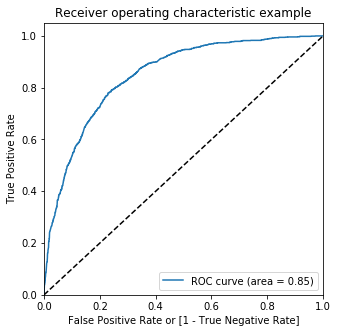

In [84]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.619667  0.946387  0.503989
0.2   0.2  0.722674  0.850039  0.677579
0.3   0.3  0.771434  0.780109  0.768363
0.4   0.4  0.795002  0.671329  0.838790
0.5   0.5  0.804754  0.537685  0.899312
0.6   0.6  0.800284  0.385392  0.947180
0.7   0.7  0.779764  0.205128  0.983219
0.8   0.8  0.749289  0.050505  0.996699
0.9   0.9  0.738521  0.000000  1.000000


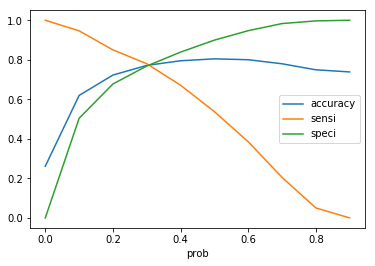

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.771434376269809

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2793,  842],
       [ 283, 1004]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7801087801087802

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.768363136176066

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23163686382393398


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5438786565547129


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.907997399219766


## Precision and Recall

In [97]:
#Looking at the confusion matrix again

In [98]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

##### Precision
TP / TP + FP

In [99]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6540642722117203

##### Recall
TP / TP + FN

In [100]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5376845376845377

Using sklearn utilities for the same

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
?precision_score

In [103]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6540642722117203

In [104]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5376845376845377

### Precision and recall tradeoff

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 4892    1
 4893    1
 4894    0
 4895    0
 4896    0
 4897    0
 4898    0
 4899    0
 4900    0
 4901    1
 4902    0
 4903    1
 4904    0
 4905    0
 4906    1
 4907    0
 4908    0
 4909    1
 4910    0
 4911    0
 4912    0
 4913    0
 4914    0
 4915    0
 4916    1
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 2

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

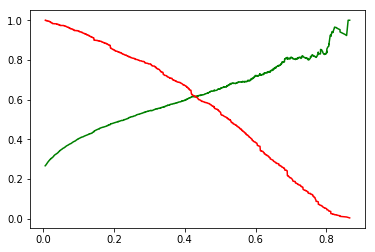

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [109]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [110]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,0,0
3730,0.999203,1,0,0,0,1,0,1,0,1,0,0,1
1761,1.040015,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0,0


In [111]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [112]:
y_test_pred = res.predict(X_test_sm)

In [113]:
y_test_pred[:10]

942     0.397413
3730    0.270295
1761    0.010238
2283    0.612692
1872    0.015869
1970    0.727206
2532    0.302131
1616    0.010315
2485    0.632881
5914    0.126451
dtype: float64

In [114]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [115]:
# Let's see the head
y_pred_1.head()

,0
942,0.397413
3730,0.270295
1761,0.010238
2283,0.612692
1872,0.015869


In [116]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.397413
1,1,3730,0.270295
2,0,1761,0.010238
3,1,2283,0.612692
4,0,1872,0.015869


In [121]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [122]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

In [123]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.397413
1,3730,1,0.270295
2,1761,0,0.010238
3,2283,1,0.612692
4,1872,0,0.015869


In [124]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [125]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.397413,0
1,3730,1,0.270295,0
2,1761,0,0.010238,0
3,2283,1,0.612692,1
4,1872,0,0.015869,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7834123222748816

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1294,  234],
       [ 223,  359]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6168384879725086

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8468586387434555